# Insight Datachallenge #1 Employee retention

## Goal
Employee turnover is a very costly problem for companies. The cost of replacing an employee if often larger than 100K USD, taking into account the time spent to interview and find a replacement, placement fees, sign-on bonuses and the loss of productivity for several months.
t is only natural then that data science has started being applied to this area. Understanding why and when employees are most likely to leave can lead to actions to improve employee retention as well as planning new hiring in advance. This application of DS is sometimes called people analytics or people data science (if you see a job title: people data scientist, this is your job).
In this challenge, you have a data set with info about the employees and have to predict when employees are going to quit by understanding the main drivers of employee churn.

## Challenge Description

We got employee data from a few companies. We have data about all employees who joined from 2011/01/24 to 2015/12/13. For each employee, we also know if they are still at the company as of 2015/12/13 or they have quit. Beside that, we have general info about the employee, such as avg salary during her tenure, dept, and yrs of experience.
As said above, the goal is to predict employee retention and understand its main drivers

## Hints:
What are the main factors that drive employee churn? Do they make sense? Explain your findings.
What might you be able to do for the company to address employee Churn, what would be follow-up actions?
If you could add to this data set just one variable that could help explain employee churn, what would that be?
Your output should be in the form a a jupyter notebook and pdf output of a jupyter notebook in which you specify your results and how you got them.

## Data
The table is: "employee_retention" - comprehensive information about employees.

### Columns:

employee_id : id of the employee. Unique by employee per company  
company_id : company id.  
dept : employee dept  
seniority : number of yrs of work experience when hired  
salary: avg yearly salary of the employee during her tenure within the company   
join_date: when the employee joined the company, it can only be between 2011/01/24 and 2015/12/13  
quit_date: when the employee left her job (if she is still employed as of 2015/12/13, this field is NA)  



## Strategy:

- make sure data is clean (check the datatype for all columns)
- create the following new columns 
    - still at company (yes/no)
    - length of employment
    - salary/years of experience
  
- do some EDA to find out more about the companies:
    - what is proportion of different roles for different companies
    - average retention rate
  
- run some sort of logistic regression model

In [1]:
### Load in some useful packages

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import qgrid
import seaborn as sns; sns.set() # this is another plotting program

pd.show_versions()


INSTALLED VERSIONS
------------------
commit: None
python: 3.7.1.final.0
python-bits: 64
OS: Darwin
OS-release: 18.2.0
machine: x86_64
processor: i386
byteorder: little
LC_ALL: None
LANG: en_US.UTF-8
LOCALE: en_US.UTF-8

pandas: 0.23.4
pytest: None
pip: 18.1
setuptools: 40.6.3
Cython: None
numpy: 1.15.4
scipy: 1.1.0
pyarrow: None
xarray: None
IPython: 7.2.0
sphinx: None
patsy: 0.5.1
dateutil: 2.7.5
pytz: 2018.9
blosc: None
bottleneck: None
tables: None
numexpr: None
feather: None
matplotlib: 3.0.2
openpyxl: None
xlrd: None
xlwt: None
xlsxwriter: None
lxml: None
bs4: None
html5lib: None
sqlalchemy: None
pymysql: None
psycopg2: None
jinja2: 2.10
s3fs: None
fastparquet: None
pandas_gbq: None
pandas_datareader: None


In [2]:
## read in the data

raw_data = pd.read_csv('employee_retention_data.csv')

In [3]:
raw_data.shape

(24702, 7)

In [4]:
## look at table

qgrid.show_grid(raw_data)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [5]:
raw_data.dtypes

employee_id    float64
company_id       int64
dept            object
seniority        int64
salary         float64
join_date       object
quit_date       object
dtype: object

In [6]:
## need to convert the Joindate into date
from datetime import datetime # this calls the datetime package

raw_data['join_date'] = pd.to_datetime(raw_data['join_date'])
raw_data['quit_date'] = pd.to_datetime(raw_data['quit_date'])
raw_data.dtypes

employee_id           float64
company_id              int64
dept                   object
seniority               int64
salary                float64
join_date      datetime64[ns]
quit_date      datetime64[ns]
dtype: object

In [7]:
## create new column that indicates if employee has quit or not
## if the quit date is NaT then should be 0/False, if there is something then should be 1/True

raw_data['employed'] = raw_data['quit_date'].apply(lambda col: pd.isnull(col))
raw_data.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,employed
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,False
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,False
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaT,True
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,False
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,False


In [9]:
### replace the NaT with the current date 2015/12/13, so that we can calculate lenght of employment for all employees
from datetime import datetime, date

raw_data.quit_date = raw_data.quit_date.fillna(date(year = 2015, month = 12, day = 13))
raw_data.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,employed
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,False
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,False
2,927315.0,4,marketing,14,101000.0,2014-10-13,2015-12-13,True
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,False
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,False


In [10]:
raw_data.dtypes

employee_id           float64
company_id              int64
dept                   object
seniority               int64
salary                float64
join_date      datetime64[ns]
quit_date      datetime64[ns]
employed                 bool
dtype: object

In [11]:
## make new column with lenght of employment

raw_data['length_employed'] = raw_data['quit_date'] - raw_data['join_date']
raw_data.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,employed,length_employed
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,False,585 days
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,False,340 days
2,927315.0,4,marketing,14,101000.0,2014-10-13,2015-12-13,True,426 days
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,False,389 days
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,False,1040 days


In [12]:
raw_data.dtypes

employee_id                float64
company_id                   int64
dept                        object
seniority                    int64
salary                     float64
join_date           datetime64[ns]
quit_date           datetime64[ns]
employed                      bool
length_employed    timedelta64[ns]
dtype: object

In [13]:
# make new column with salary/seniority (years of experience)

raw_data['salary/seniority'] = raw_data['salary'] / raw_data['seniority']
raw_data.head()


,employee_id,company_id,dept,seniority,salary,join_date,quit_date,employed,length_employed,salary/seniority
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,False,585 days,3178.571429
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,False,340 days,9150.000000
2,927315.0,4,marketing,14,101000.0,2014-10-13,2015-12-13,True,426 days,7214.285714
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,False,389 days,5750.000000
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,False,1040 days,12000.000000


## some EDA

- look at distribution of the data
- look on a per company basis - what is average emplyoment
- look on a per role basis - was is average employment
- do I have any missing data and if yes how much


In [14]:
raw_data.isnull().sum()

employee_id         0
company_id          0
dept                0
seniority           0
salary              0
join_date           0
quit_date           0
employed            0
length_employed     0
salary/seniority    0
dtype: int64

In [15]:
raw_data['length_employed'].mean()

Timedelta('574 days 07:39:28.812241')

(array([4.180e+02, 7.870e+02, 4.640e+02, 5.120e+02, 7.050e+02, 1.008e+03,
        1.253e+03, 1.142e+03, 9.880e+02, 1.120e+03, 1.202e+03, 1.057e+03,
        1.118e+03, 1.077e+03, 9.340e+02, 8.020e+02, 6.190e+02, 7.530e+02,
        7.390e+02, 7.010e+02, 6.860e+02, 6.450e+02, 5.850e+02, 6.300e+02,
        5.520e+02, 4.470e+02, 4.580e+02, 2.810e+02, 3.320e+02, 2.700e+02,
        2.590e+02, 2.390e+02, 2.390e+02, 1.900e+02, 2.240e+02, 2.640e+02,
        2.100e+02, 2.100e+02, 1.370e+02, 1.420e+02, 9.200e+01, 8.300e+01,
        5.000e+01, 3.300e+01, 2.800e+01, 7.000e+00, 5.000e+00, 1.000e+00,
        2.000e+00, 2.000e+00]),
 array([ 17000.,  24820.,  32640.,  40460.,  48280.,  56100.,  63920.,
         71740.,  79560.,  87380.,  95200., 103020., 110840., 118660.,
        126480., 134300., 142120., 149940., 157760., 165580., 173400.,
        181220., 189040., 196860., 204680., 212500., 220320., 228140.,
        235960., 243780., 251600., 259420., 267240., 275060., 282880.,
        290700., 2985

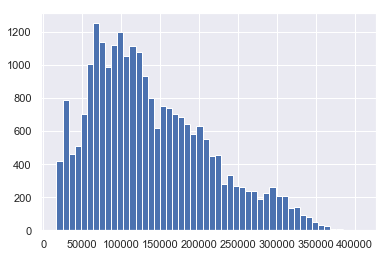

In [16]:
# look at distribution of data
plt.hist(raw_data['salary'], bins = 50)

(array([1803., 1776., 1886., 1936., 1871., 1912., 1814., 1847., 1765.,
        1754., 1546., 1528., 1409., 1227.,  626.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    2.]),
 array([ 1.  ,  2.96,  4.92,  6.88,  8.84, 10.8 , 12.76, 14.72, 16.68,
        18.64, 20.6 , 22.56, 24.52, 26.48, 28.44, 30.4 , 32.36, 34.32,
        36.28, 38.24, 40.2 , 42.16, 44.12, 46.08, 48.04, 50.  , 51.96,
        53.92, 55.88, 57.84, 59.8 , 61.76, 63.72, 65.68, 67.64, 69.6 ,
        71.56, 73.52, 75.48, 77.44, 79.4 , 81.36, 83.32, 85.28, 87.24,
        89.2 , 91.16, 93.12, 95.08, 97.04, 99.  ]),
 <a list of 50 Patch objects>)

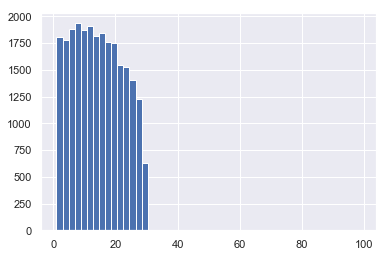

In [17]:
plt.hist(raw_data['seniority'], bins = 50)

looks like there is two outliers in the years of experience, went up and checked in qgrid. There are two records where work experience is indicated with 98 and 99 years. Dropped these records. 

is index 24700 and 24701

(array([2684., 2781., 2880., 2839., 1814., 2740., 2626., 2331., 2152.,
        1853.]),
 array([ 1. ,  3.8,  6.6,  9.4, 12.2, 15. , 17.8, 20.6, 23.4, 26.2, 29. ]),
 <a list of 10 Patch objects>)

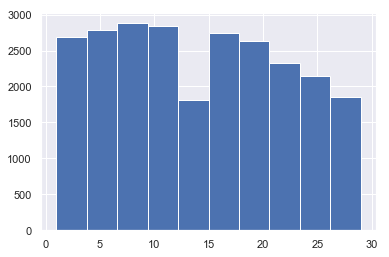

In [18]:
#dropped two outliers

data = raw_data.drop([24700, 24701], axis=0)
plt.hist(data['seniority'])

In [19]:
data.groupby('dept').mean()

,employee_id,company_id,seniority,salary,employed,salary/seniority
dept,,,,,,
customer_service,498143.365251,3.441721,14.171133,82245.424837,0.445098,7640.075509
data_science,500726.793103,3.440439,14.189028,206885.893417,0.472727,19031.252433
design,500995.411594,3.386957,14.197826,137460.869565,0.436232,12863.969630
engineer,502682.060711,3.428448,14.153946,205531.439722,0.488075,19188.324406
marketing,502645.858181,3.384397,13.966835,135582.438408,0.437145,12894.726315
sales,510257.236129,3.427175,13.979823,135912.358134,0.429067,12697.085692


In [20]:
data.groupby('company_id').mean()

,employee_id,seniority,salary,employed,salary/seniority
company_id,,,,,
1,501761.214260,14.131998,152163.700648,0.455510,14244.829457
2,503864.736618,14.297489,155728.090952,0.477499,14196.348497
3,496656.524918,14.054565,122118.588578,0.443070,11410.891741
4,513380.616392,14.023763,122721.144520,0.440834,11552.797771
5,507257.065527,14.474644,123348.717949,0.439886,11162.462194
6,490152.278079,14.089853,119925.639040,0.448490,11097.503672
7,501416.076797,13.906046,121582.516340,0.434641,11605.597233
8,493358.904489,13.867240,122284.622732,0.446991,11508.691307
9,505596.132154,13.778356,123905.306972,0.449532,12004.257711


## Run a logistic Regression model

- need to standardize/normalize variables to mean 0, variance 1
- need to make dummy variables from dep and from company_id
- drop: join_date, quit_date, employee_id
- outcome variable is employed - also needs to be dropped from feature table

In [21]:
# scale data to mean 0 and variance 1

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

data['salary']= preprocessing.scale(data['salary'])
data['seniority']= preprocessing.scale(data['seniority'])
data['length_employed']= preprocessing.scale(data['length_employed'])
data['salary/seniority']= preprocessing.scale(data['salary/seniority'])
data.mean()

/anaconda3/envs/insight/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/envs/insight/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype timedelta64[ns] was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/envs/insight/lib/python3.7/site-packages/sklearn/preprocessing/data.py:176: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


employee_id         5.016166e+05
company_id          3.426802e+00
seniority          -4.955101e-17
salary              4.955101e-17
employed            4.531174e-01
length_employed     2.270788e-17
salary/seniority   -1.765569e-16
dtype: float64

In [22]:
# need to first make the company ID to a string
data['company_id'] = data['company_id'].apply(str)
data.dtypes

employee_id                float64
company_id                  object
dept                        object
seniority                  float64
salary                     float64
join_date           datetime64[ns]
quit_date           datetime64[ns]
employed                      bool
length_employed            float64
salary/seniority           float64
dtype: object

In [23]:
# make dummy variables out of categorical features

data = pd.get_dummies(data, dummy_na=False, drop_first=True)
data.head()

,employee_id,seniority,salary,join_date,quit_date,employed,length_employed,salary/seniority,company_id_10,company_id_11,...,company_id_5,company_id_6,company_id_7,company_id_8,company_id_9,dept_data_science,dept_design,dept_engineer,dept_marketing,dept_sales
0,13021.0,1.723252,-0.646590,2014-03-24,2015-10-30,False,0.029634,-0.997049,0,0,...,0,0,1,0,0,0,0,0,0,0
1,825355.0,0.729954,0.589361,2013-04-29,2014-04-04,False,-0.647952,-0.383494,0,0,...,0,0,1,0,0,0,0,0,1,0
2,927315.0,-0.015020,-0.488809,2014-10-13,2015-12-13,True,-0.410105,-0.582385,0,0,...,0,0,0,0,0,0,0,0,1,0
3,662910.0,0.729954,-0.304731,2012-05-14,2013-06-07,False,-0.512435,-0.732838,0,0,...,0,0,1,0,0,0,0,0,0,0
4,256971.0,1.102441,1.812164,2011-10-17,2014-08-22,False,1.288006,-0.090661,0,0,...,0,0,0,0,0,1,0,0,0,0


In [24]:
y = data['employed']

In [25]:
# drop the columns I don't need and make new dataframe used for analysis

X = data.drop([
 'employee_id',
 'join_date',
 'quit_date',
 'employed'], axis=1)

In [26]:
X.head()

,seniority,salary,length_employed,salary/seniority,company_id_10,company_id_11,company_id_12,company_id_2,company_id_3,company_id_4,company_id_5,company_id_6,company_id_7,company_id_8,company_id_9,dept_data_science,dept_design,dept_engineer,dept_marketing,dept_sales
0,1.723252,-0.646590,0.029634,-0.997049,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0.729954,0.589361,-0.647952,-0.383494,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2,-0.015020,-0.488809,-0.410105,-0.582385,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3,0.729954,-0.304731,-0.512435,-0.732838,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1.102441,1.812164,1.288006,-0.090661,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
logreg = LogisticRegression(penalty='l1')
logreg.fit(X_train, y_train)

/anaconda3/envs/insight/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [28]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.63


In [29]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[2312  394]
 [1456  778]]


In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

#precision is true postives/everything that is selected
#recall: out of all true positives how many are actually selected

              precision    recall  f1-score   support

       False       0.61      0.85      0.71      2706
        True       0.66      0.35      0.46      2234

   micro avg       0.63      0.63      0.63      4940
   macro avg       0.64      0.60      0.59      4940
weighted avg       0.64      0.63      0.60      4940



In [31]:
#figure out the coeffiences for each columnh
column = X.columns.tolist()

logreg.coef1_ = np.transpose(logreg.coef_)
logreg.coef1_ = logreg.coef1_.tolist()

coef = pd.DataFrame(logreg.coef1_, index=column)
qgrid.show_grid(coef)
#coef.shape

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

## Conclusion:

**What are the main factors that drive employee churn? Do they make sense?** 
The main factor driving employee churn are years employed at the company (coeff -0.24). Some other less important factors of people retention is company ID (company 11 vs company 12, salary and type of role. of the Less importantly company ID is important.
The fact that the lenght of employment at a company is a big contributer to people leaving makes sense. 

**What might you be able to do for the company to address employee Churn, what would be follow-up actions?**  
Give some incentives, benefits for people who have been employed for a certain number of years. For example more vacation days, special bonuses etc. 

**If you could add to this data set just one variable that could help explain employee churn, what would that be?**  
Since salary is a "retention factor" and length of employment is a "leaving factor" an interesting variable to include in this problem is the amount of salary growth over time. 